Часть 2. Многоклассовая логистическая регрессия

Задание: Для рассмотренного в предыдущей работе набора данных Iris, решить задачу многоклассовой логистической регрессии. Отрисовать полученное решение на плоскости 'petal length - petal width'. Выполнить в отдельном блокноте.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_data = iris.data[:, [2, 3]]
iris_target = iris.target

Разбиваем данные на обучающий и тестовый наборы 
и обучаем модель


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_target, test_size=0.3, random_state=1)

# C=100.0 - параметр регуляризации
# solver='lbfgs' - алгоритм оптимизации
# multi_class='ovr' - метод решения задачи многоклассовой классификации
# random_state=1 - генератор случайных чисел
lr = LogisticRegression(C=100.0, solver='lbfgs',
                        multi_class='ovr', random_state=1)

# Обучаем модель
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

Отрисовка графика

In [3]:

# Создаем массивы для значений координат
# mesh_step - шаг сетки
# np.arange - возвращает равномерно распределенные значения внутри заданного интервала
# np.arange(1, 5, 0.2) - от 1 до 5 с шагом 0.2
# np.arange(1, 5, 0.2)[:, np.newaxis] - преобразование одномерного массива в двумерный

mesh_step = 0.02
x_min, x_max = iris_data[:, 0].min() - 1, iris_data[:,
                                                    0].max() + 1  # petal length
y_min, y_max = iris_data[:, 1].min() - 1, iris_data[:,
                                                    1].max() + 1  # petal width

# xx - массив, в котором каждая строка - копия x
# yy - массив, в котором каждый столбец - копия y
xx, yy = np.arange(x_min, x_max, mesh_step), np.arange(y_min, y_max, mesh_step)
xx, yy = np.meshgrid(xx, yy)

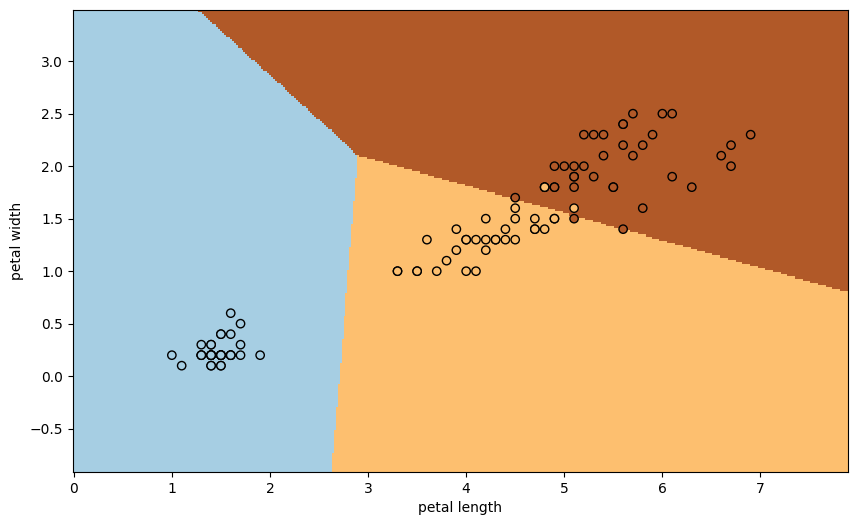

In [4]:

# Предсказываем классы для каждого элемента сетки
# np.c_ - трансформация в двумерный массив
# ravel() - преобразование в одномерный массив
# Z - массив, в котором каждый элемент - предсказанный класс
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Отрисовываем границу принятия решений
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Отрисовываем точки обучающего набора
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()